In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

# Para componentes principales
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
long = [93,94,96,101,102,103,104,106]
ancho = [76,78,80,84,85,82,83,83]

X = pd.DataFrame({'long': long, 'ancho': ancho})

In [4]:
X_star = X - X.mean()

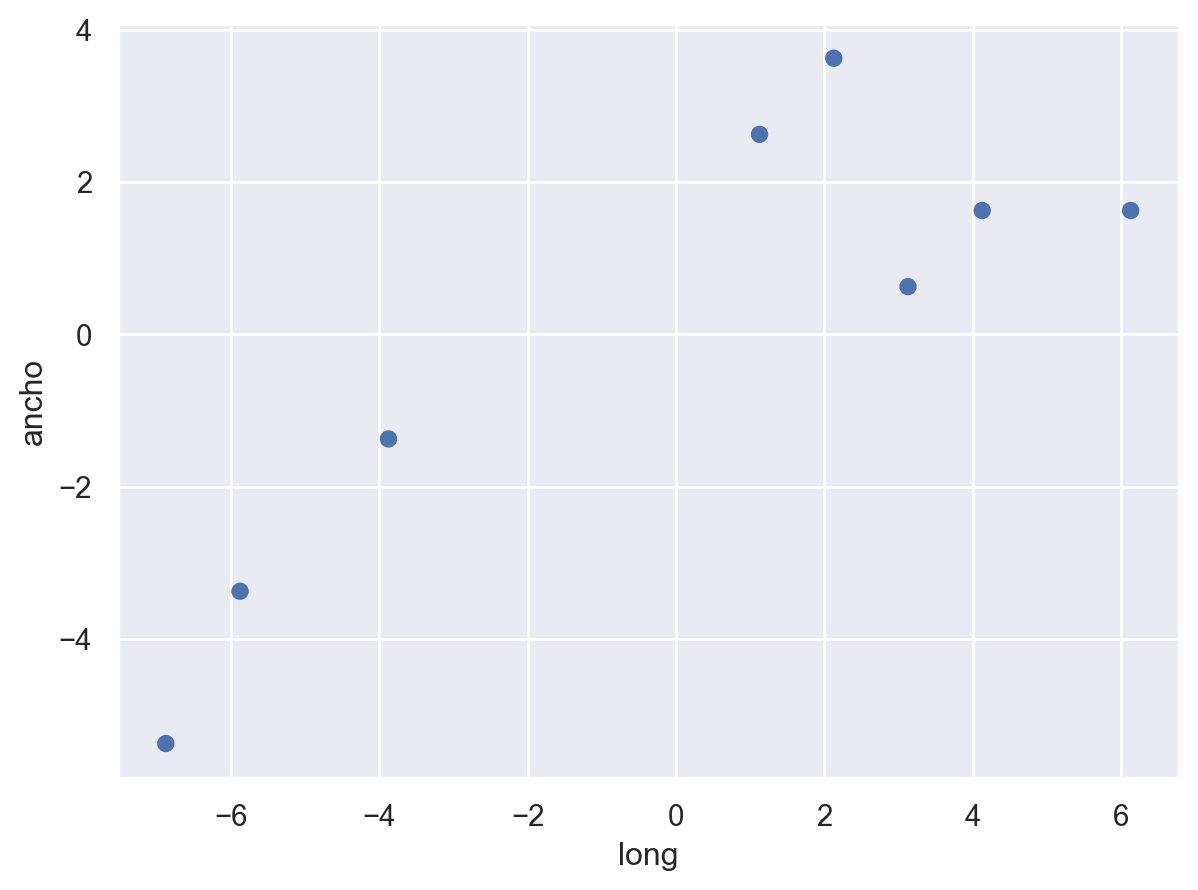

In [5]:
(
    so.Plot(data=X_star, x='long', y='ancho')
    .add(so.Dot())
)

In [6]:
sigma = X_star.transpose() @ X_star / len(X_star)
sigma

,long,ancho
long,20.859375,11.421875
ancho,11.421875,8.484375


In [7]:
np.cov(X.transpose(), bias = 1) #Da igual

array([[20.859375, 11.421875],
       [11.421875,  8.484375]])

In [8]:
gamma, U = np.linalg.eigh(sigma) 
print(gamma)
print(U)

[ 1.68171008 27.66203992]
[[ 0.51170211 -0.85916293]
 [-0.85916293 -0.51170211]]


In [9]:
gamma = np.flip(gamma)
print(gamma)

U = np.flip(U, 1)  
print(U)

[27.66203992  1.68171008]
[[-0.85916293  0.51170211]
 [-0.51170211 -0.85916293]]


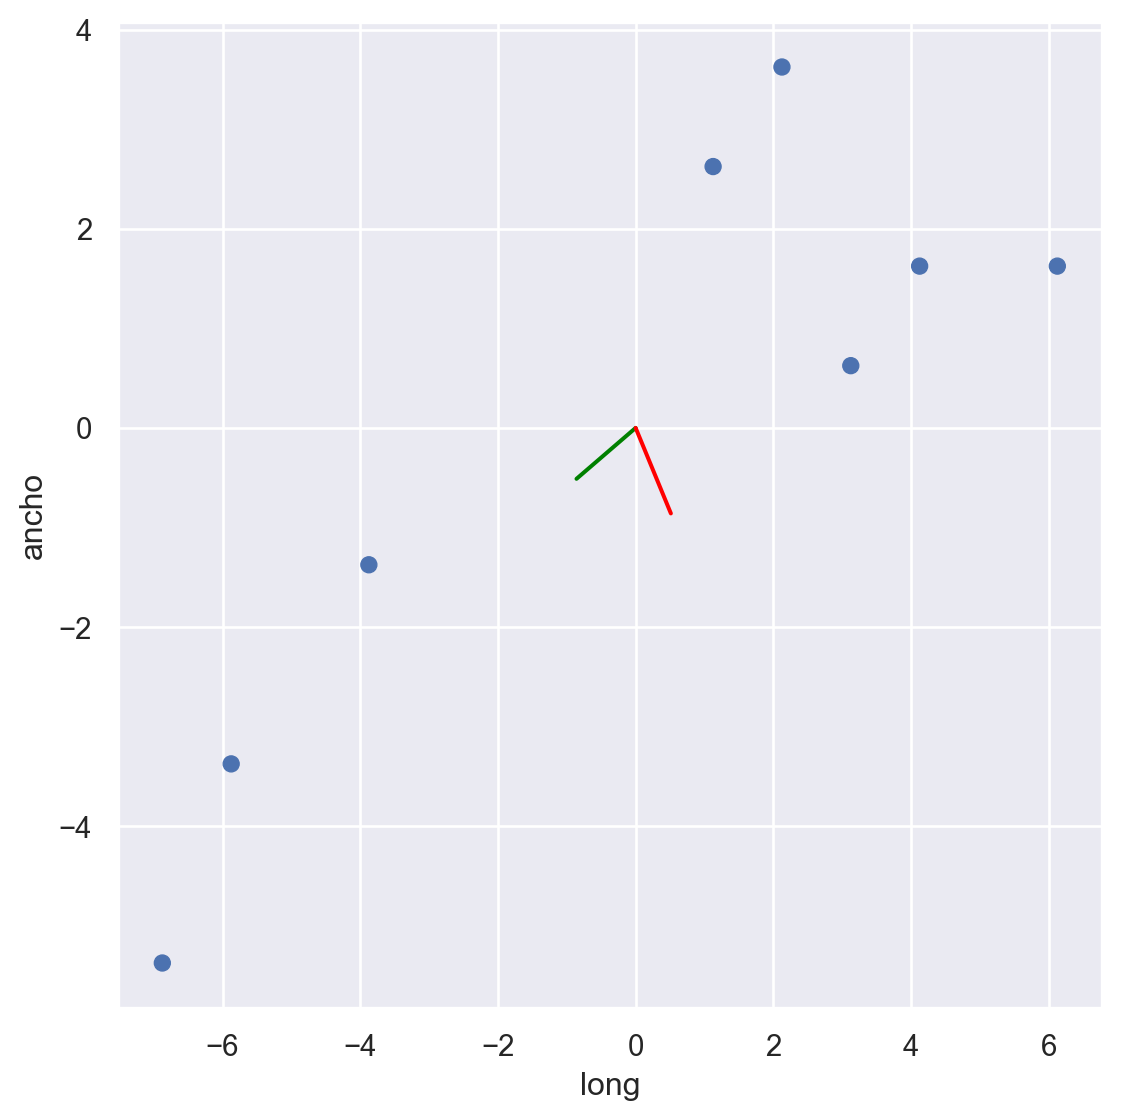

In [10]:
(
    so.Plot()
    .add(so.Dot(), x = X_star["long"], y = X_star["ancho"])
    .add(so.Line(color = "green"), x = [0, U[0,0]], y = [0, U[1,0]]) # Primera dirección principal
    .add(so.Line(color = "red"), x = [0, U[0,1]], y = [0, U[1,1]]) # Segunda dirección principal
    .layout(size = (6,6))
)

In [11]:
Z = X_star @ U
Z.columns = ["Z1", "Z2"]  
Z #Corresponde a los datos en las nuevas componentes, parece tener mayor varianza Z1

,Z1,Z2
0,8.657144,1.100049
1,6.774577,-0.106575
2,4.032847,-0.801497
3,-2.309776,-1.679638
4,-3.680641,-2.027099
5,-3.004698,1.062092
6,-4.375563,0.714631
7,-6.093889,1.738036


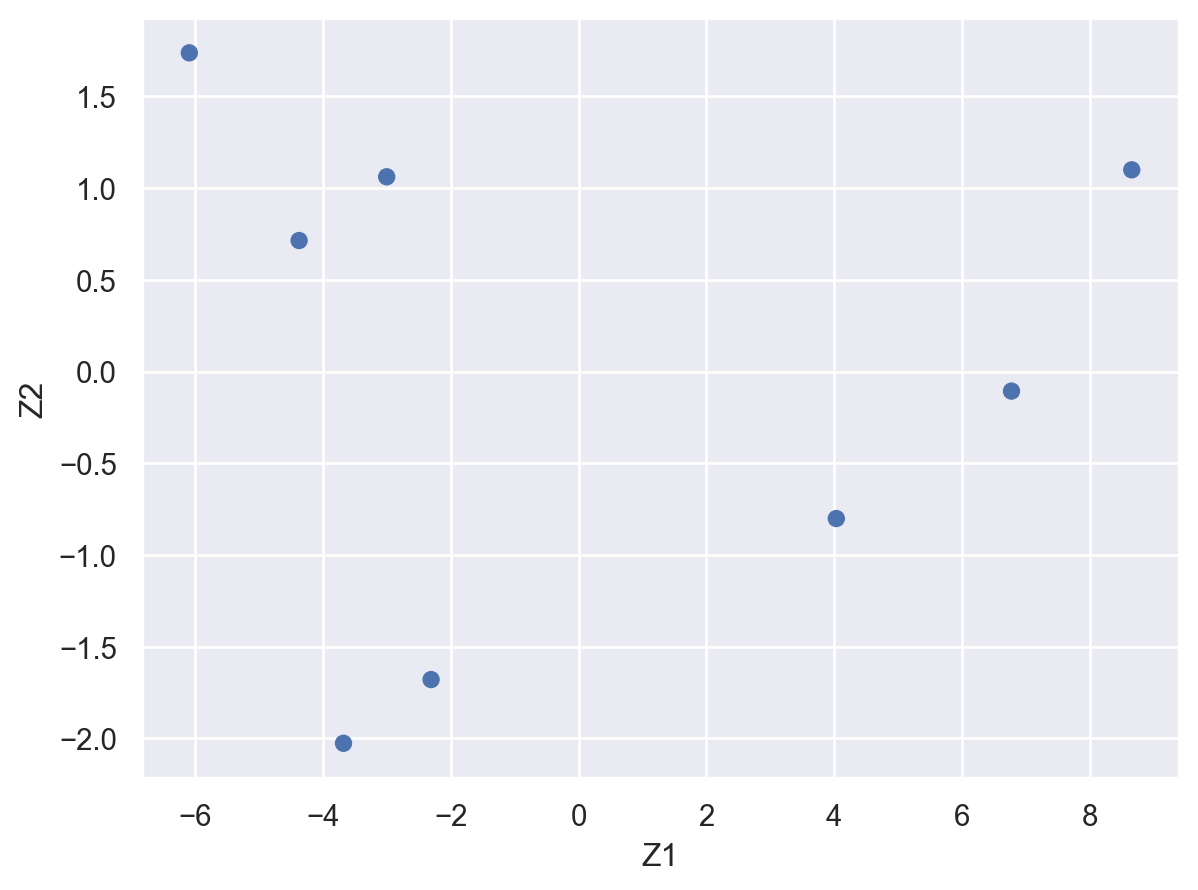

In [12]:
(
    so.Plot(data = Z, x = "Z1", y = "Z2")
    .add(so.Dot())
)

In [13]:
for i in range(0,2,1):
    print(gamma[i]/gamma.sum())

#Claramente la primera componente tiene muchisima mas varianza
#Hasta se podria reducir la dimension de los datos a Z1 unicamente y estarian bien adaptados

0.9426893265004208
0.05731067349957914


In [14]:
A = [[3,1,1],[1,3,1],[1,1,5]]

In [15]:
gamma, U = np.linalg.eigh(A)

In [16]:
gamma = np.flip(gamma)
print(gamma)

U = np.flip(U, 1)  
print(U)

[6. 3. 2.]
[[ 4.08248290e-01  5.77350269e-01  7.07106781e-01]
 [ 4.08248290e-01  5.77350269e-01 -7.07106781e-01]
 [ 8.16496581e-01 -5.77350269e-01 -4.67292701e-18]]


In [17]:
for i in range(0,3,1):
    print(f"z_{i+1} = {U[i]}")

z_1 = [0.40824829 0.57735027 0.70710678]
z_2 = [ 0.40824829  0.57735027 -0.70710678]
z_3 = [ 8.16496581e-01 -5.77350269e-01 -4.67292701e-18]


In [18]:
x = [2,2,1]
x_star = x - np.mean(x)

In [19]:
z_1 = x_star @ U[0]
z_2 = x_star @ U[1]
print(z_1, z_2)

-0.14287166757320213 0.7999373740088611


In [20]:
def min_comp_princ(archivo, p_acum):
    archivo_star = archivo - archivo.mean()
    sigma = (archivo_star.transpose() @ archivo_star) / len(archivo_star)
    gamma = np.flip(np.linalg.eigh(sigma)[0])
    cant_comp = 0
    var_acum = 0
    while (var_acum < p_acum):
        var_acum += gamma[cant_comp]/gamma.sum()
        cant_comp += 1
    return cant_comp

In [21]:
chalets = pd.read_csv('p8-chalets.csv')
chalets

,Promotora,DuracionHipoteca,PrecioMedio,SuperficieCocina
0,1,8.7,0.3,3.1
1,2,14.3,0.9,7.4
2,3,18.9,1.8,9.0
3,4,19.0,0.8,9.4
4,5,20.5,0.9,8.3
5,6,14.7,1.1,7.6
6,7,18.8,2.5,12.6
7,8,37.3,2.7,18.1
8,9,12.6,1.3,5.9
9,10,25.7,3.4,15.9


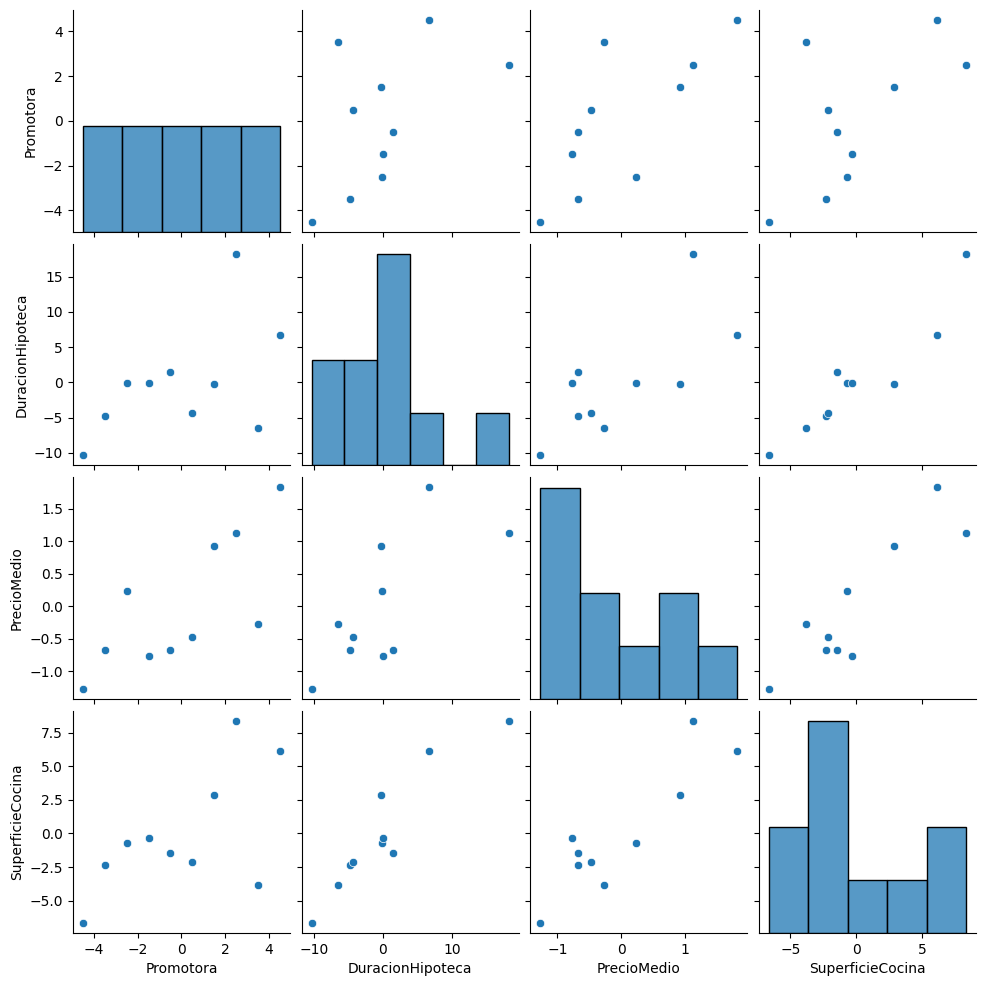

In [22]:
chalets_star = chalets - chalets.mean()
sns.pairplot(chalets_star)

In [23]:
sigma = (chalets_star.transpose() @ chalets_star) / len(chalets_star)
sigma

,Promotora,DuracionHipoteca,PrecioMedio,SuperficieCocina
Promotora,8.250,11.3350,2.0250,7.9550
DuracionHipoteca,11.335,56.9685,5.1705,30.4775
PrecioMedio,2.025,5.1705,0.8941,3.6479
SuperficieCocina,7.955,30.4775,3.6479,18.7641


In [24]:
gamma, U = np.linalg.eigh(sigma)

In [25]:
gamma = np.flip(gamma)
U = np.flip(U, 1)
print(gamma)
print(U) 

[77.1758364   6.13104476  1.49201908  0.07779976]
[[-0.19769591 -0.90573104  0.3695674   0.06314711]
 [-0.85212743  0.33861092  0.38912278 -0.08834567]
 [-0.0858126  -0.15623688 -0.26698382 -0.94707226]
 [-0.47689766 -0.20145463 -0.80045177  0.30209537]]


Pareceria que teniendo en cuenta las primeras dos componentes se tendria un cubrimiento de mas del 95 porciento de la varianza

In [26]:
print('Con las primeras dos componentes se tiene una varianza del:', round(100*(gamma[0] + gamma[1])/gamma.sum(), 2), '%')

Con las primeras dos componentes se tiene una varianza del: 98.15 %


In [27]:
print('La primera componente principal seria:', U[0])
print('Con un porcentaje de variabilidad de:', round(100*gamma[0]/gamma.sum(), 2))

La primera componente principal seria: [-0.19769591 -0.90573104  0.3695674   0.06314711]
Con un porcentaje de variabilidad de: 90.93


In [28]:
Z = chalets_star @ U
Z.columns = ["Z1", "Z2", "Z3", "Z4"]  

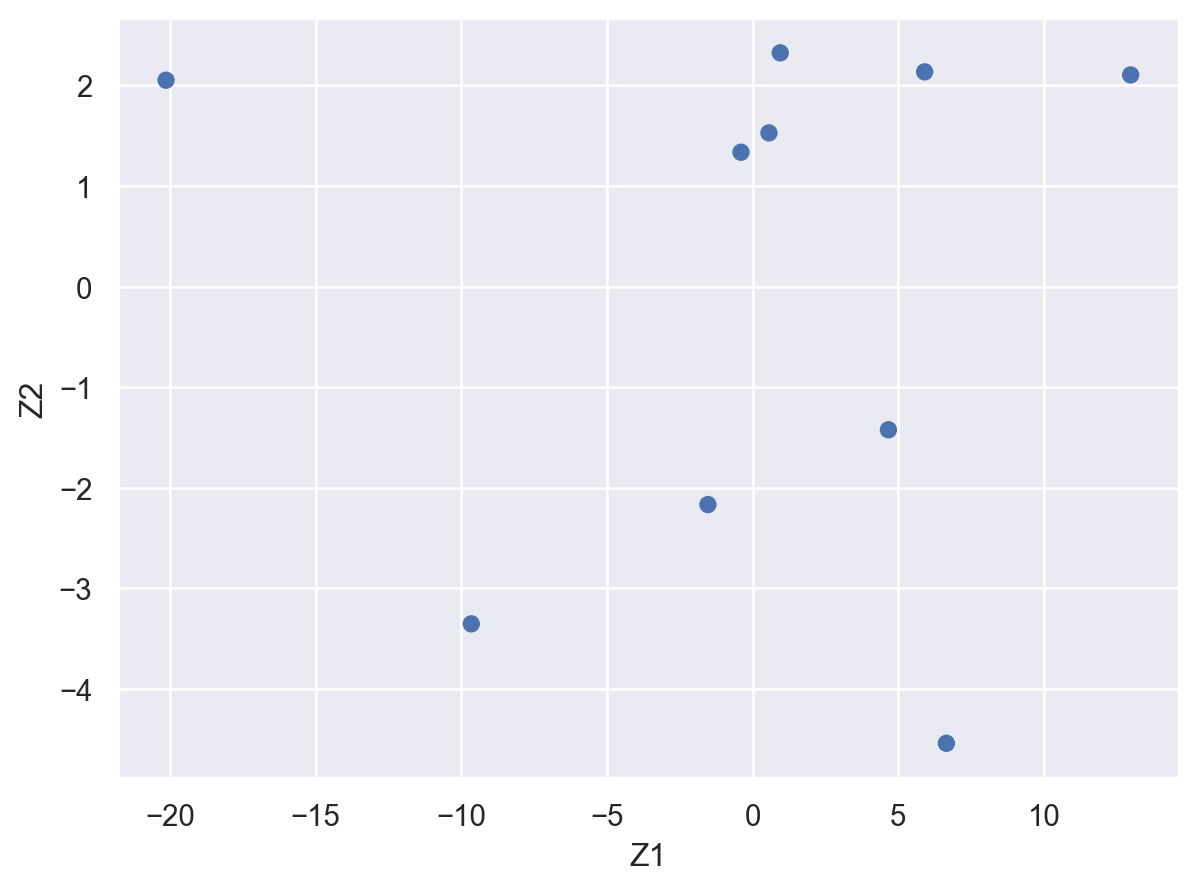

In [29]:
(
    so.Plot(data = Z, x = "Z1", y = "Z2")
    .add(so.Dot())
)

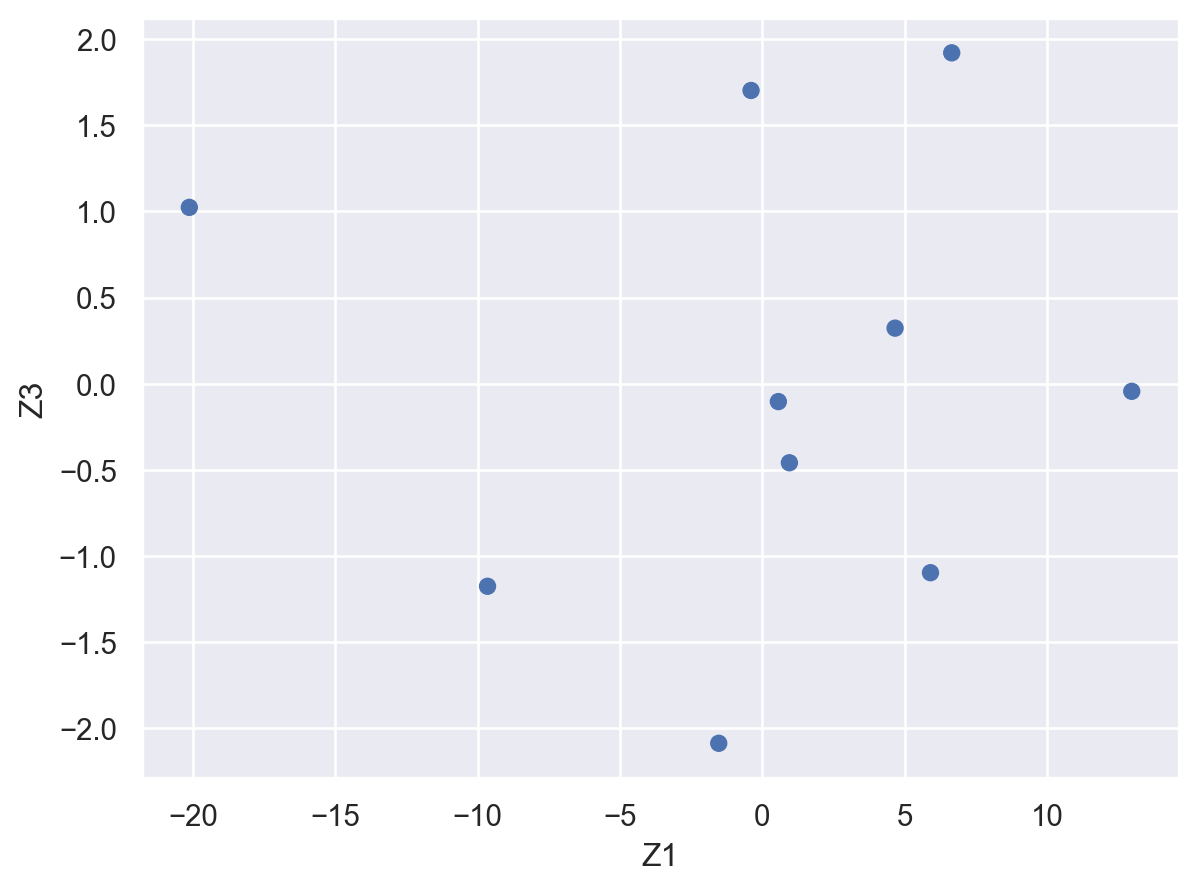

In [30]:
(
    so.Plot(data = Z, x = "Z1", y = "Z3")
    .add(so.Dot())
)

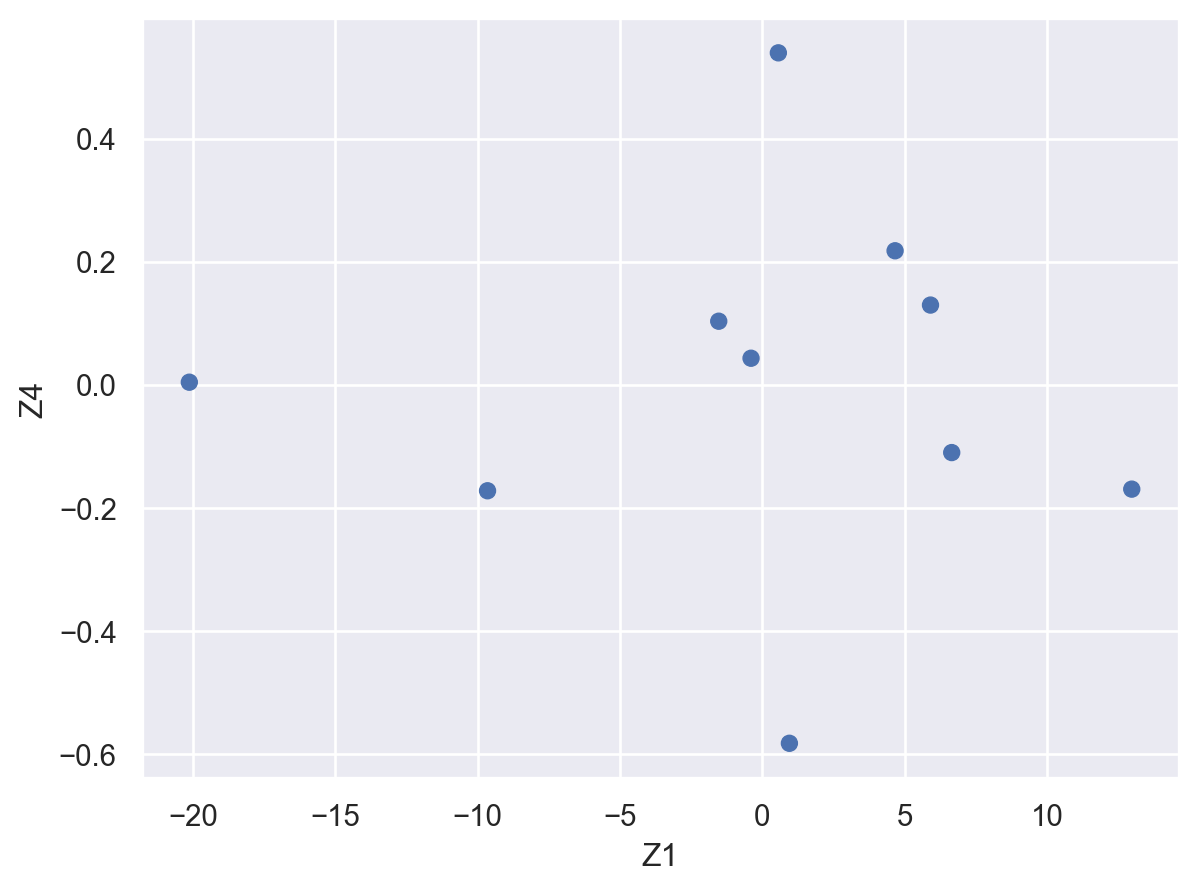

In [31]:
(
    so.Plot(data = Z, x = "Z1", y = "Z4")
    .add(so.Dot())
)

In [32]:
iris = pd.read_csv('p8-iris.txt', sep = '\t')
iris

,LongSepalo,AnchoSepalo,LongPetalo,AnchoPetalo
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [33]:
cant = min_comp_princ(iris, 0.9)
cant

1

In [34]:
iris_star = iris - iris.mean()
sigma = (iris_star.transpose() @ iris_star) / len(iris_star)
sigma

,LongSepalo,AnchoSepalo,LongPetalo,AnchoPetalo
LongSepalo,0.681122,-0.039007,1.265191,0.513458
AnchoSepalo,-0.039007,0.186751,-0.319568,-0.117195
LongPetalo,1.265191,-0.319568,3.092425,1.287745
AnchoPetalo,0.513458,-0.117195,1.287745,0.578532


In [35]:
gamma, U = np.linalg.eigh(sigma)

In [36]:
gamma = np.flip(gamma)
U = np.flip(U, 1)

In [37]:
gamma[0]/gamma.sum()

0.9246162071742682

In [38]:
Z = iris_star @ U
Z.columns = ["Z1", "Z2", "Z3", "Z4"] 

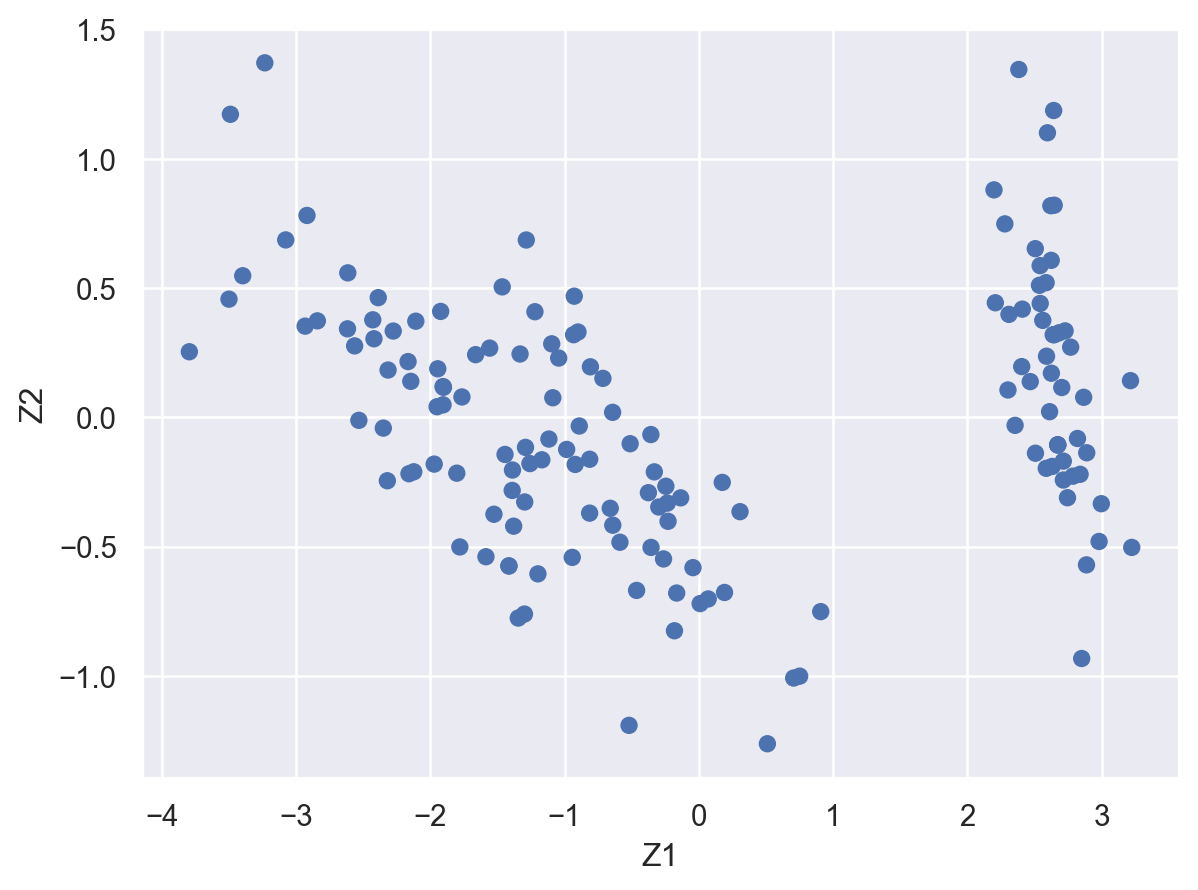

In [39]:
(
    so.Plot(data = Z, x = "Z1", y = "Z2")
    .add(so.Dot())
)

In [53]:
hosp = pd.read_csv('p8-hospitales-escalado.csv')
hosp.index = hosp['Servicio']
hosp = hosp.drop('Servicio', axis = 1)

hosp_t = hosp.transpose()

In [58]:
Sigma = (hosp_t @ hosp) / len(hosp)
Sigma

,NI,MO,RE,NE,ICM,ES
NI,0.178607,0.078081,0.065508,0.092769,0.064201,0.128047
MO,0.078081,0.129103,0.078398,0.100547,0.134559,0.104148
RE,0.065508,0.078398,0.145966,0.144975,0.176561,0.076606
NE,0.092769,0.100547,0.144975,0.263738,0.190374,0.104564
ICM,0.064201,0.134559,0.176561,0.190374,0.303438,0.102842
ES,0.128047,0.104148,0.076606,0.104564,0.102842,0.126366


In [60]:
gamma, U = np.linalg.eigh(Sigma)
gamma = np.flip(gamma)
U = np.flip(U,1)

In [65]:
print((gamma[0])/gamma.sum())
print((gamma[1])/gamma.sum())
print((gamma[0]+gamma[1])/gamma.sum())

0.6737176162103118
0.17028793326508695
0.8440055494753987


In [78]:
Z = hosp @ U
Z.columns = ['Z' + str(x) for x in range(1,7)]
Z

,Z1,Z2,Z3,Z4,Z5,Z6
Servicio,,,,,,
Cirugia,-0.882697,-0.148625,0.204501,0.034353,-0.094778,0.095510
Tocoginecologia,-0.568378,-0.859009,-0.025540,0.432411,-0.061469,-0.047466
Hematologia,-1.057230,0.530120,0.279090,0.098873,-0.069310,-0.061971
Cardiologia,-0.602229,0.247450,0.374540,0.144186,-0.076420,0.055481
Digestivo,-0.704550,0.145968,0.173894,-0.197557,0.036906,-0.116159
Medicina.Interna,-1.679987,-0.754013,0.090111,-0.418268,0.168449,0.042327
Neumologia,-0.751721,0.341845,0.505306,0.033130,-0.058995,-0.092722
Otorrinolaringologia,-0.710644,0.211835,-0.430382,-0.213349,-0.080660,-0.063783
Oftalmologia,-0.572211,0.150067,-0.515662,-0.152094,-0.250461,-0.046238


In [75]:
hosp

,NI,MO,RE,NE,ICM,ES
Servicio,,,,,,
Cirugia,0.358385,0.304,0.244275,0.257901,0.564103,0.443958
Tocoginecologia,1.000000,0.024,0.221374,0.065260,0.008547,0.447995
Hematologia,0.000000,0.328,0.503817,0.356053,1.000000,0.082968
Cardiologia,0.040369,0.176,0.282443,0.000000,0.675214,0.160020
Digestivo,0.044879,0.472,0.229008,0.294376,0.470085,0.130156
Medicina.Interna,0.790638,1.000,0.404580,0.781110,0.452991,1.000000
Neumologia,0.015675,0.408,0.320611,0.020049,0.820513,0.085489
Otorrinolaringologia,0.034572,0.168,0.160305,0.799670,0.307692,0.044112
Oftalmologia,0.107580,0.000,0.000000,0.788719,0.264957,0.000000


In [97]:
agua = pd.read_csv('p8-calidad-agua.csv')

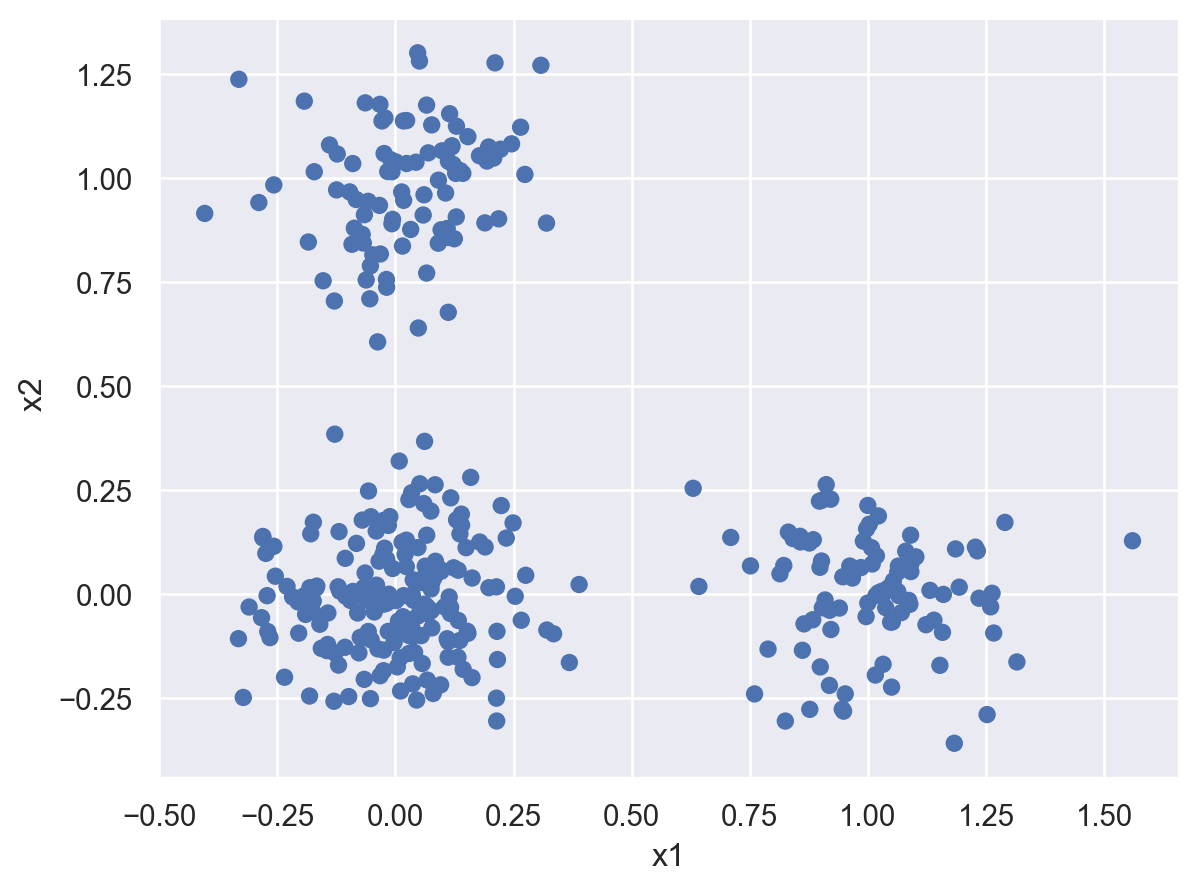

In [98]:
(
    so.Plot(data = agua, x = 'x1', y = ' x2')
    .add(so.Dot())
)

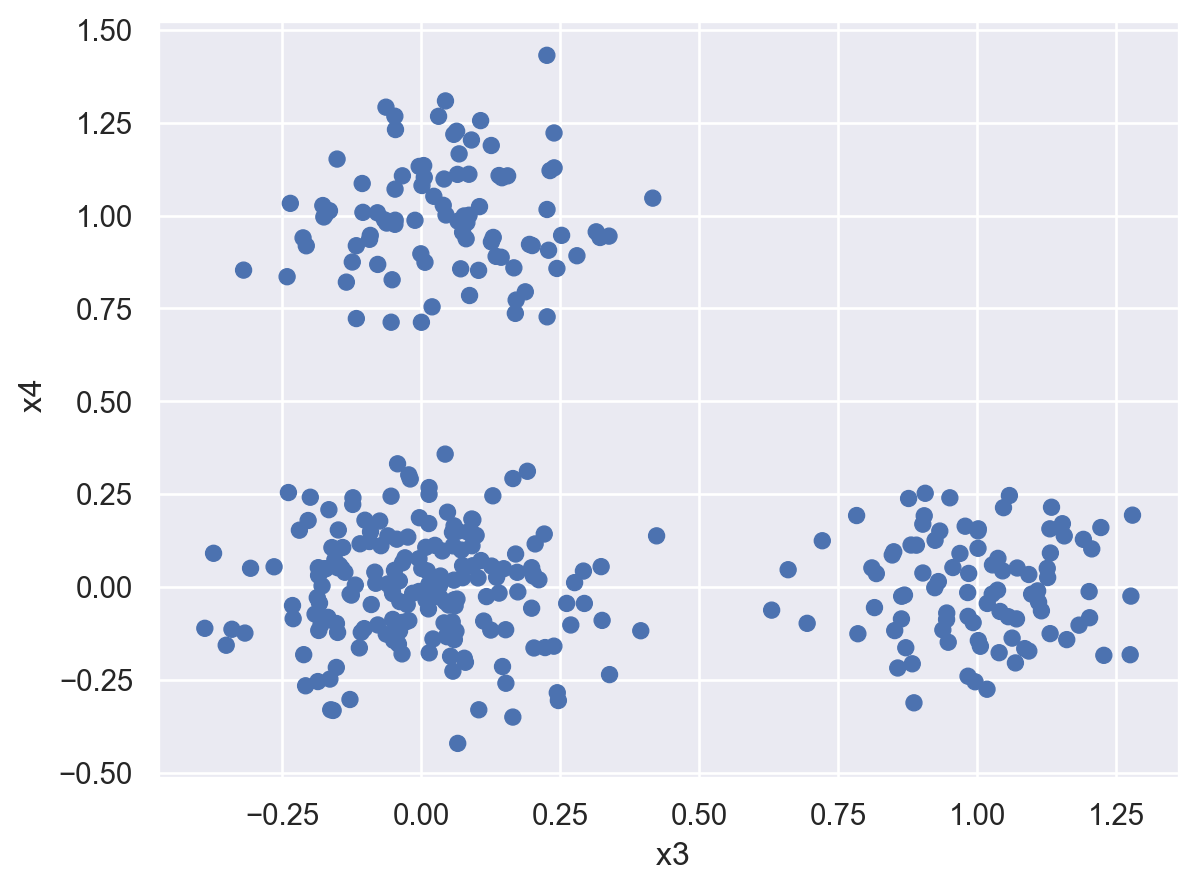

In [100]:
(
    so.Plot(data = agua, x = ' x3', y = ' x4')
    .add(so.Dot())
)

In [101]:
agua_star = (agua - agua.mean()) / agua.std()

In [102]:
Sigma = (agua_star.transpose() @ agua_star) / len(agua)

In [112]:
gamma, U = np.linalg.eigh(Sigma)
gamma = np.flip(gamma)
U = np.flip(U, 1)

In [108]:
Z = agua_star @ U
Z.columns = ['Z'+str(x) for x in range(1,5)]
Z = Z[['Z1', 'Z2']]

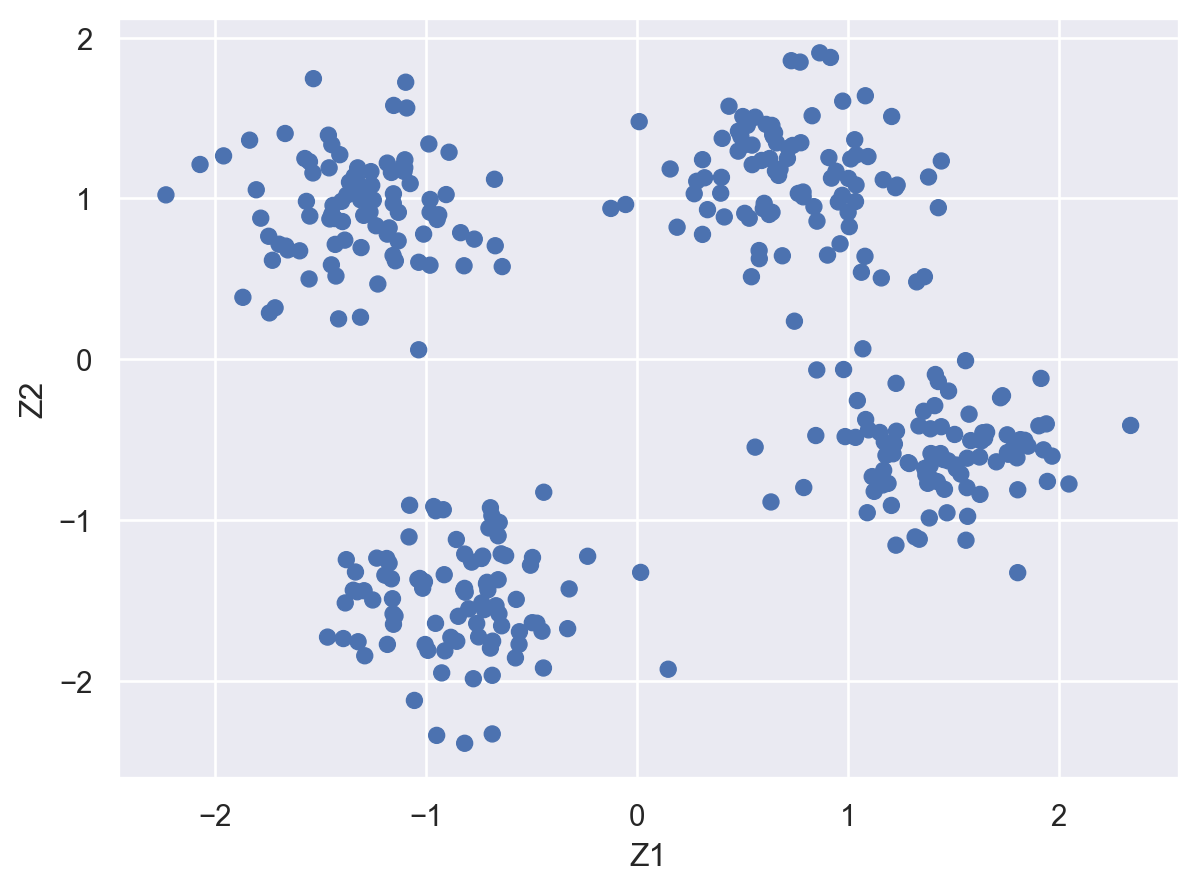

In [114]:
(
    so.Plot(data = Z, x = 'Z1', y = 'Z2')
    .add(so.Dot())
)

In [118]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4)

etiquetas = kmeans.fit_predict(Z)

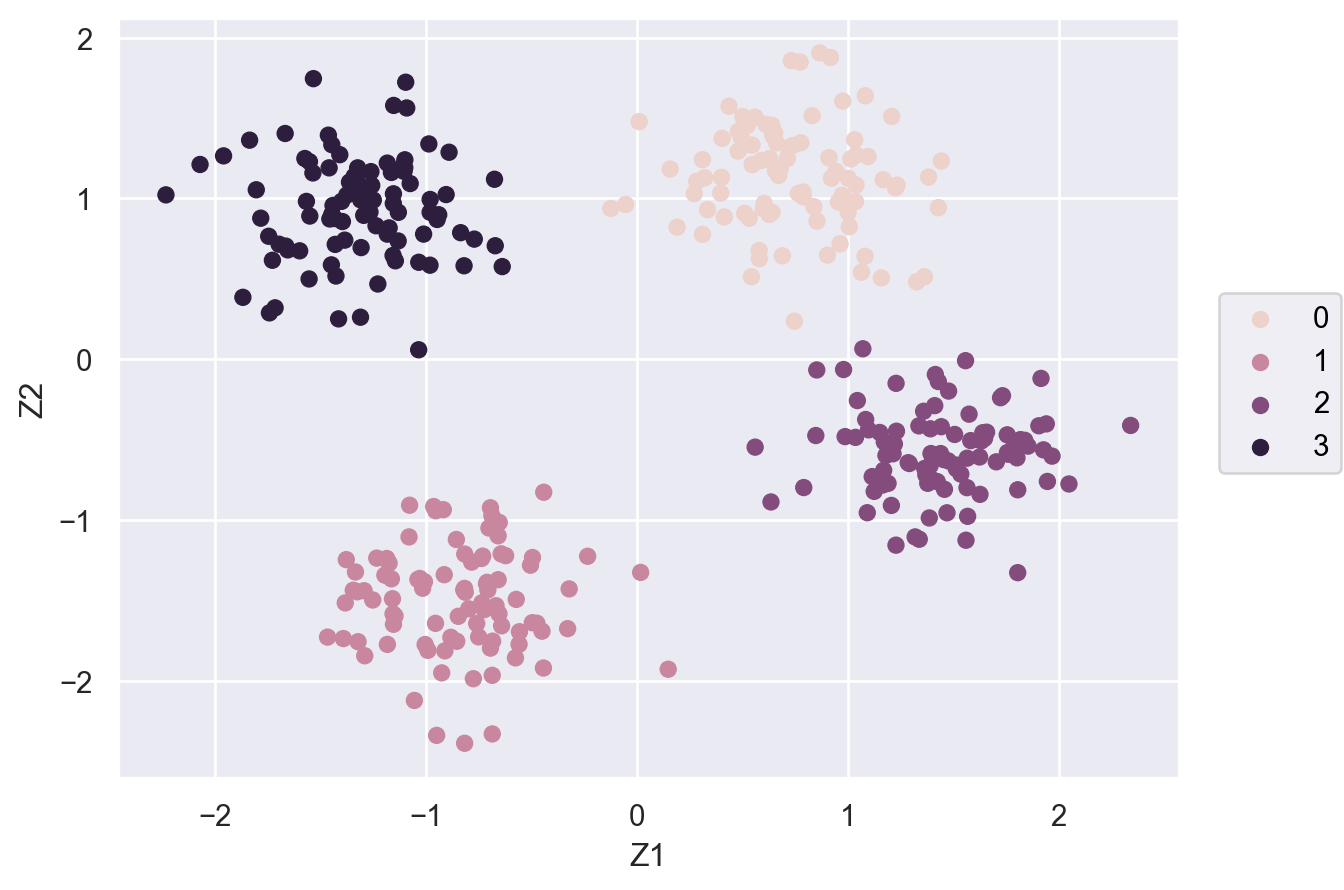

In [119]:
(
    so.Plot(data = Z, x='Z1', y='Z2', color = etiquetas)
    .add(so.Dot())
)